In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-indonesia-default-risk/sample_submission.csv
/kaggle/input/home-credit-indonesia-default-risk/bureau_balance.csv
/kaggle/input/home-credit-indonesia-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-indonesia-default-risk/application_train.csv
/kaggle/input/home-credit-indonesia-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-indonesia-default-risk/application_test.csv
/kaggle/input/home-credit-indonesia-default-risk/previous_application.csv
/kaggle/input/home-credit-indonesia-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-indonesia-default-risk/installments_payments.csv
/kaggle/input/home-credit-indonesia-default-risk/bureau.csv


# Import libraries

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Problem Understanding

**Business Objective**: The objective is to enhance the loan approval rate by optimizing the credit scoring model to accept a higher number of creditworthy applicants, resulting in improved business performance and greater customer satisfaction.
**Evaluation Metric**: Precision, which ensures that the approved applicants are highly likely to be creditworthy.

# 2. Data Understanding

The information was acquired from the internal data of the company, and it was made available through the Virtual Internship Experience offered by Home Credit Indonesia. The dataset comprises 307,511 entries and 122 columns, with 106 being numerical and 16 categorical. Each entry contains diverse historical details related to an individual credit customer.

In [3]:
application_train = pd.read_csv("/kaggle/input/home-credit-indonesia-default-risk/application_train.csv")
application_test = pd.read_csv("/kaggle/input/home-credit-indonesia-default-risk/application_test.csv")

In [4]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# 3. Data Cleaning

Several actions have been taken for data cleaning and pre-processing:

1. No duplicate entries were found after detection.
2. Columns with more than 50,000 (>15%) missing values were removed.
3. Entries with missing values were eliminated without imputation to avoid bias.
4. Some outliers were identified using the Z-score, but they were retained to prevent bias and information loss.
5. 'XNA' values in the 'CODE_GENDER' and 'ORGANIZATION_TYPE' columns were removed.
6. Feature extraction was performed.
7. Feature encoding was done using one-hot encoding.

After performing data cleaning and pre-processing, there are 216,152 entries (-30%) and 155 columns (+27%) remaining.

## Detecting duplicates

In [5]:
duplicate = application_train[application_train.duplicated(['SK_ID_CURR'])]
duplicate

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


## Handling missing values

In [6]:
# Calculate the number of missing values in each column
missing_values_count = application_train.isnull().sum()

# Get the list of columns with more than 50000 missing values
columns_to_drop = missing_values_count[missing_values_count > 50000].index.tolist()

# Drop the columns from the DataFrame
application_train = application_train.drop(columns=columns_to_drop)

# Print the columns that were dropped
print("Columns dropped:")
print(columns_to_drop)

Columns dropped:
['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAR

In [7]:
# List the names of the columns to be dropped
columns_to_drop_na = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_ANNUITY']
df_cleaned = application_train.dropna(subset=columns_to_drop_na)

# Print the number of rows dropped and the new DataFrame shape
num_rows_dropped = len(application_train) - len(df_cleaned)
print(f"Number of rows with missing values in columns {columns_to_drop_na}: {num_rows_dropped}")
print(f"New DataFrame shape after dropping rows with missing valus: {df_cleaned.shape}")

Number of rows with missing values in columns ['AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_ANNUITY']: 44088
New DataFrame shape after dropping rows with missing valus: (263423, 71)


## Detecting outliers

In [8]:
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using z-score method.
    Parameters:
        data (pandas.Series): The data to check for outliers.
        threshold (float): The z-score threshold for outlier detection. Default is 3.
    Returns:
        pandas.Series: A boolean Series indicating whether each data point is an outlier or not.
    """
    z_scores = (data - data.mean()) / data.std()
    return abs(z_scores) > threshold

# Extract numeric columns only
numeric_columns = df_cleaned.select_dtypes(include='number')

# Initialize an empty DataFrame to store the outlier values
outlier_values = pd.DataFrame(columns=numeric_columns.columns)

# Check for outliers in numeric columns
for column in numeric_columns:
    outliers = detect_outliers_zscore(numeric_columns[column])
    outlier_values[column] = numeric_columns[column][outliers]

# Print the columns and their corresponding outlier values
print("Outliers in numeric columns:")
print(outlier_values.head())

Outliers in numeric columns:
    SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0          NaN       1           NaN               NaN         NaN   
26         NaN       1           NaN               NaN         NaN   
40         NaN       1           NaN               NaN         NaN   
42         NaN       1           NaN               NaN         NaN   
81         NaN       1           NaN               NaN         NaN   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           NaN              NaN                         NaN         NaN   
26          NaN              NaN                         NaN         NaN   
40          NaN              NaN                         NaN         NaN   
42          NaN              NaN                         NaN         NaN   
81          NaN              NaN                         NaN         NaN   

    DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0            

## Handling 'XNA' values

In [9]:
# Separate categorical columns
categorical_columns = df_cleaned.select_dtypes(include='object')

# Initialize a boolean mask to keep track of rows without 'XNA' values
mask = pd.Series(True, index=df_cleaned.index)

# Iterate through categorical columns and update the mask
for column in categorical_columns:
    mask &= (df_cleaned[column] != 'XNA')

# Remove rows with 'XNA' values from the DataFrame
df_cleaned_filtered = df_cleaned[mask]

# Separate categorical columns
categorical_columns = df_cleaned_filtered.select_dtypes(include='object')

# Iterate through categorical columns and show unique values
for column in categorical_columns:
    unique_values = categorical_columns[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'NAME_CONTRACT_TYPE': ['Cash loans' 'Revolving loans']
Unique values in 'CODE_GENDER': ['M' 'F']
Unique values in 'FLAG_OWN_CAR': ['N' 'Y']
Unique values in 'FLAG_OWN_REALTY': ['Y' 'N']
Unique values in 'NAME_TYPE_SUITE': ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_A' 'Children' 'Other_B'
 'Group of people']
Unique values in 'NAME_INCOME_TYPE': ['Working' 'State servant' 'Commercial associate' 'Student' 'Pensioner'
 'Businessman' 'Maternity leave']
Unique values in 'NAME_EDUCATION_TYPE': ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in 'NAME_FAMILY_STATUS': ['Single / not married' 'Married' 'Widow' 'Civil marriage' 'Separated']
Unique values in 'NAME_HOUSING_TYPE': ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in 'WEEKDAY_APPR_PROCESS_START': ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY'

# 4. Feature Extraction

Feature extraction was performed by binning the customer's age 'DAYS_BIRTH' to create a new column 'AGE_CATEGORY' representing age categories.

In [10]:
# Convert 'DAYS_BIRTH' to positive values and convert to years
df_cleaned_filtered['AGE'] = abs(df_cleaned_filtered['DAYS_BIRTH']) / 365.25

# Function to categorize age into age categories
def categorize_age(age):
    if age < 20:
        return 'Late Teen'
    elif 20 <= age < 30:
        return 'Twenty'
    elif 30 <= age < 40:
        return 'Forty'
    elif 40 <= age < 50:
        return 'Fifty'
    elif 50 <= age < 60:
        return 'Sixty'
    else:
        return 'Above Sixty'

# Apply the categorize_age function to create the 'AGE_CATEGORY' column
df_cleaned_filtered['AGE_CATEGORY'] = df_cleaned_filtered['AGE'].apply(categorize_age)

# Optional: Drop the intermediate 'AGE' column
df_cleaned_filtered.drop(columns=['AGE'], inplace=True)

# Display the DataFrame with the new 'AGE_CATEGORY' column
df_cleaned_filtered['AGE_CATEGORY']

0         Twenty
1          Fifty
2          Sixty
4          Sixty
5          Fifty
           ...  
307502     Fifty
307503     Forty
307508     Fifty
307509     Forty
307510     Fifty
Name: AGE_CATEGORY, Length: 216152, dtype: object

# 5. Feature Encoding

Feature encoding was done using one-hot encoding.

In [11]:
# Identify the categorical columns in the DataFrame
categorical_columns = df_cleaned_filtered.select_dtypes(include='object').columns

# Perform one-hot encoding on the categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df_cleaned_filtered[categorical_columns]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_columns)
one_hot_encoded.index = df_cleaned_filtered.index

# Drop the original categorical columns from the DataFrame
df_cleaned_encoded = df_cleaned_filtered.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded columns to the DataFrame
df_cleaned_encoded = pd.concat([df_cleaned_encoded, one_hot_encoded], axis=1)

# 6. Feature Selection

The feature selection was performed using the SelectKBest library, with the ANOVA scoring function used for numerical features and the Chi-squared scoring function used for categorical features.

In [12]:
# Exclude the target variable 'TARGET'
X = df_cleaned_filtered.drop(columns=['DAYS_BIRTH', 'TARGET'])

# Separate numeric and categorical columns
numeric_columns = X.select_dtypes(include='number')
categorical_columns = X.select_dtypes(include='object')

# Normalize numeric columns with negative values using MinMaxScaler
scaler = MinMaxScaler()
numeric_columns_normalized = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Separate the target column
y = df_cleaned_filtered['TARGET']

# Function to select the top 'k' features using SelectKBest and return their names
def select_top_k_features(selector, X, y, k=25):
    selector.fit(X, y)
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_, 'P-value': selector.pvalues_})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False).head(k)
    return feature_scores

# ANOVA for numeric columns
f_classif_selector = SelectKBest(f_classif, k=25)
top_f_classif_features = select_top_k_features(f_classif_selector, numeric_columns_normalized, y)

# Perform one-hot encoding on categorical columns
one_hot_encoded = pd.get_dummies(categorical_columns, drop_first=True)

# Separate the target column
y_categorical = df_cleaned_filtered['TARGET']

# Chi-square for categorical columns
chi2_selector = SelectKBest(chi2, k=25)
top_chi2_features = select_top_k_features(chi2_selector, one_hot_encoded, y_categorical)

# Print top 25 numerical features selected by ANOVA
print("Top 25 numerical features selected by ANOVA:")
print(top_f_classif_features)

# Print top 25 categorical features selected by Chi-square
print("\nTop 25 categorical features selected by Chi-square:")
print(top_chi2_features)

# Storing the top 25 of each numeric and categorical variables into the variable final_features
final_features = top_f_classif_features['Feature'].to_list() + top_chi2_features ['Feature'].to_list()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 25 numerical features selected by ANOVA:
                        Feature        Score        P-value
26                 EXT_SOURCE_2  5909.475289   0.000000e+00
7                 DAYS_EMPLOYED  1186.050193  3.328222e-259
18  REGION_RATING_CLIENT_W_CITY   888.810501  6.620955e-195
17         REGION_RATING_CLIENT   819.900654  5.533575e-180
31       DAYS_LAST_PHONE_CHANGE   683.093375  2.436697e-150
5               AMT_GOODS_PRICE   500.201848  1.148255e-110
24       REG_CITY_NOT_WORK_CITY   379.714250   1.697827e-84
23       REG_CITY_NOT_LIVE_CITY   361.965499   1.223789e-80
33              FLAG_DOCUMENT_3   354.442011   5.287333e-79
3                    AMT_CREDIT   322.326226   5.089352e-72
9               DAYS_ID_PUBLISH   313.818172   3.607552e-70
6    REGION_POPULATION_RELATIVE   304.333193   4.173699e-68
8             DAYS_REGISTRATION   258.706076   3.551523e-58
28     DEF_30_CNT_SOCIAL_CIRCLE   231.516164   2.963694e-52
30     DEF_60_CNT_SOCIAL_CIRCLE   204.986459   1.790765

# 7. Exploratory Data Analysis

The best numerical features correlated to the target variable are as follows:

1. EXT_SOURCE_2
2. DAYS_EMPLOYED (representing how many days before the application the person started current employment)
3. REGION_RATING_CLIENT_W_CITY (representing the rating of the region where the client lives, taking the city into account)
4. REGION_RATING_CLIENT (representing the rating of the region where the client lives)
5. DAYS_LAST_PHONE_CHANGE (representing how many days before the application the client changed their phone).

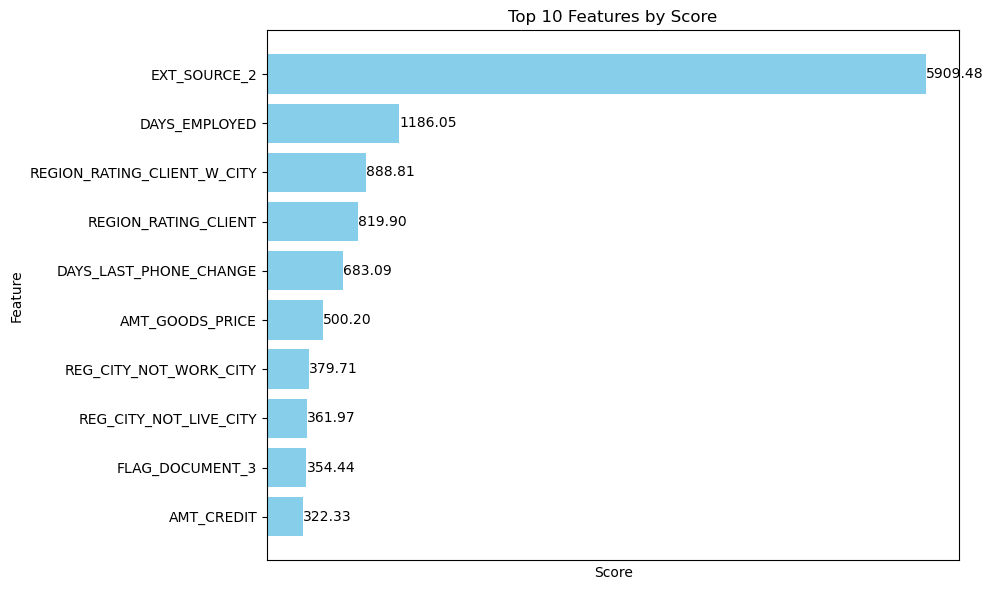

In [13]:
# Select only the top 10 rows
top_10_features = top_f_classif_features.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(top_10_features['Feature'], top_10_features['Score'], color='skyblue')

# Add values next to the bars
for index, value in enumerate(top_10_features['Score']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

# Remove the values in the x-axis
plt.xticks([])

# Set appropriate labels and title
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Features by Score')

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # To make sure everything fits well in the plot
plt.show()

The best categorical features correlated to the target variable are as follows:

1. NAME_EDUCATION_TYPE_Higher education (representing the level of highest education the client achieved)
2. AGE_CATEGORY_Twenty (representing the age category of the client)
3. CODE_GENDER_M (representing the gender of the client)
4. NAME_CONTRACT_TYPE_Revolving loans (representing the identification if loan is cash or revolving)
5. NAME_EDUCATION_TYPE_Secondary / secondary special (representing the level of highest education the client achieved).

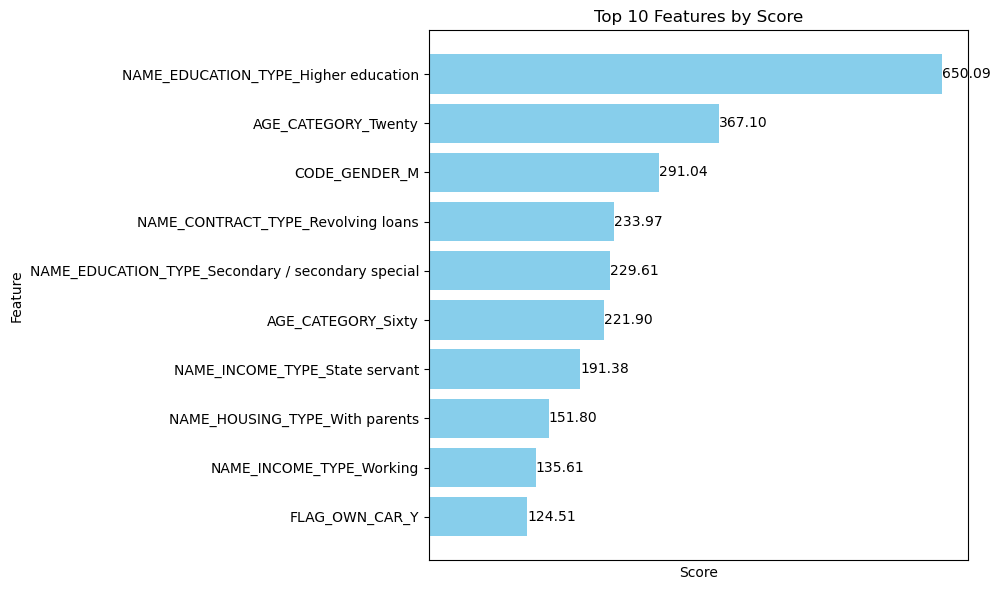

In [14]:
# Select only the top 10 rows
top_10_features = top_chi2_features.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(top_10_features['Feature'], top_10_features['Score'], color='skyblue')

# Add values next to the bars
for index, value in enumerate(top_10_features['Score']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

# Remove the values in the x-axis
plt.xticks([])

# Set appropriate labels and title
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Features by Score')

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # To make sure everything fits well in the plot
plt.show()

"Twenty" represents the age category with the highest default percentage, and "above sixty" represents the age category with the lowest default percentage.

In [15]:
# Filter the DataFrame to include only rows where 'TARGET' is 0 (APPROVED) or 1 (DEFAULT)
approved_df = df_cleaned_filtered[df_cleaned_filtered['TARGET'] == 0]
not_approved_df = df_cleaned_filtered[df_cleaned_filtered['TARGET'] == 1]

# Group and count the occurrences of 'TARGET' (0 - APPROVED) for each 'AGE_CATEGORY'
approved_counts = approved_df.groupby('AGE_CATEGORY')['TARGET'].count().reset_index()
approved_counts.rename(columns={'TARGET': 'APPROVED'}, inplace=True)

# Group and count the occurrences of 'TARGET' (1 - DEFAULT) for each 'AGE_CATEGORY'
not_approved_counts = not_approved_df.groupby('AGE_CATEGORY')['TARGET'].count().reset_index()
not_approved_counts.rename(columns={'TARGET': 'DEFAULT'}, inplace=True)

# Merge the approved and DEFAULT counts based on 'AGE_CATEGORY'
merged_df = pd.merge(approved_counts, not_approved_counts, on='AGE_CATEGORY', how='outer')

# Fill NaN values with 0 for categories with no approved or DEFAULT entries
merged_df.fillna(0, inplace=True)

# Calculate the 'TOTAL' column by summing 'APPROVED' and 'DEFAULT' columns
merged_df['TOTAL'] = merged_df['APPROVED'] + merged_df['DEFAULT']

# Order the DataFrame by the 'APPROVED' column in descending order
sorted_df = merged_df.sort_values(by='APPROVED', ascending=False)
sorted_df['DEFAULT PERCENTAGE'] = (sorted_df['DEFAULT'] / sorted_df['TOTAL']) * 100

# Display the sorted DataFrame
print(sorted_df)

  AGE_CATEGORY  APPROVED  DEFAULT  TOTAL  DEFAULT PERCENTAGE
2        Forty     64595     6554  71149            9.211654
1        Fifty     60592     4834  65426            7.388500
3        Sixty     36271     2406  38677            6.220751
4       Twenty     31662     3959  35621           11.114230
0  Above Sixty      5066      213   5279            4.034855


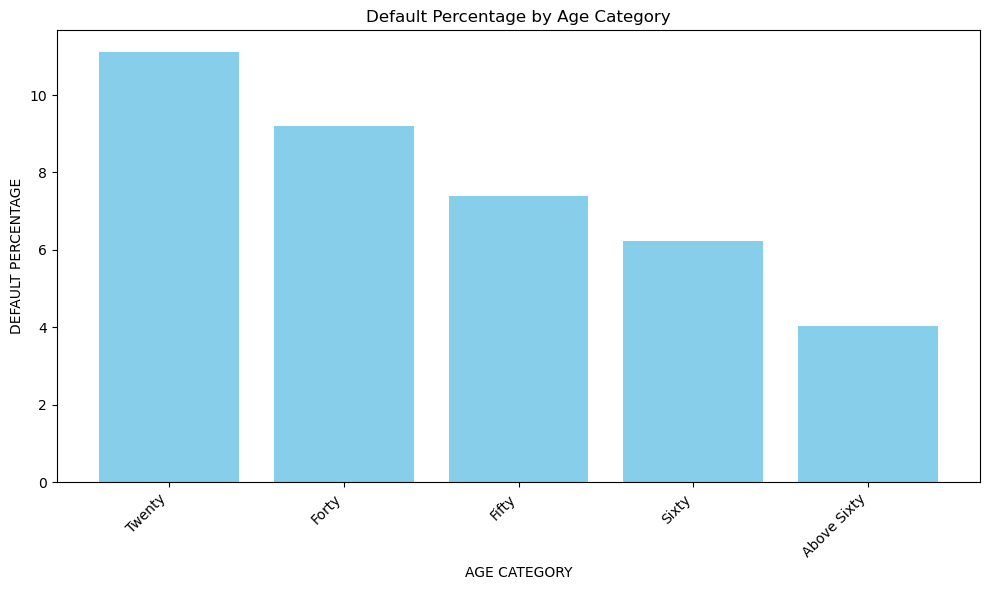

In [16]:
# Sort the DataFrame by 'DEFAULT PERCENTAGE' column in descending order
sorted_df = sorted_df.sort_values(by='DEFAULT PERCENTAGE', ascending=False)

# Create the column plot (bar plot)
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['AGE_CATEGORY'], sorted_df['DEFAULT PERCENTAGE'], color='skyblue')
plt.xlabel('AGE CATEGORY')
plt.ylabel('DEFAULT PERCENTAGE')
plt.title('Default Percentage by Age Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

# 8. Modeling & Evaluation

## Model 1

The first classification model is logistic regression with penalty L1 (Lasso) and c=0.1. The model's parameters were obtained using GridSearchCV with 5-fold cross-validation. The data was split into training data (80%) and test data (20%). To address class imbalance, oversampling was applied to the training data using the Random Oversampler.

In [17]:
# Split the data into features (X) and target (y)
X = df_cleaned_encoded[final_features]
y = df_cleaned_encoded['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create the Logistic Regression model with L1 regularization and C=0.1
logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42)

# Fit the model on the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Interpret the model
coefficients = logreg.coef_[0]
sorted_indices = coefficients.argsort()[::-1]

print("\nFeature Coefficients (sorted in descending order):")
for i in range(len(final_features)):
    print(f"{final_features[sorted_indices[i]]}: {coefficients[sorted_indices[i]]}")

Accuracy: 0.6570747842983045
Precision: 0.14587658048688432
Recall: 0.6503084688726865
F1 Score: 0.23829830961311205
ROC AUC Score: 0.6539957824005435

Confusion Matrix:
[[26087 13578]
 [ 1247  2319]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     39665
           1       0.15      0.65      0.24      3566

    accuracy                           0.66     43231
   macro avg       0.55      0.65      0.51     43231
weighted avg       0.89      0.66      0.73     43231


Feature Coefficients (sorted in descending order):
REGION_POPULATION_RELATIVE: 1.1383985421999663
ORGANIZATION_TYPE_Transport: type 3: 0.4549451501789811
AGE_CATEGORY_Forty: 0.4254199667952954
CODE_GENDER_M: 0.37624198109353735
FLAG_DOCUMENT_3: 0.3403559082112945
AGE_CATEGORY_Twenty: 0.319525836870281
REGION_RATING_CLIENT_W_CITY: 0.3193202903572499
NAME_EDUCATION_TYPE_Lower secondary: 0.30788149355817
AGE_CATEGORY_Fifty: 0.24917915714757
REG_C

## Model 2

The second classification model is Random Forest with minimum number of samples required to split an internal node is 2 and minimum number of samples required to be at a leaf node is 1. The model's parameters were obtained using RandomizedSearchCV with 10 iterations and 5-fold cross-validation. The data was split into training data (80%) and test data (20%). To address class imbalance, oversampling was applied to the training data using the Random Oversampler.

In [18]:
# Split the data into features (X) and target (y)
X = df_cleaned_encoded[final_features]
y = df_cleaned_encoded['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create the RandomForestClassifier with specified hyperparameters
rf = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Interpret the model
feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

print("\nFeature Importances:")
for i in range(len(final_features)):
    print(f"{final_features[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}")

Accuracy: 0.9168652124632787
Precision: 0.34782608695652173
Recall: 0.0089736399326977
F1 Score: 0.01749589939857846
ROC AUC Score: 0.5037304856665883

Confusion Matrix:
[[39605    60]
 [ 3534    32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     39665
           1       0.35      0.01      0.02      3566

    accuracy                           0.92     43231
   macro avg       0.63      0.50      0.49     43231
weighted avg       0.87      0.92      0.88     43231


Feature Importances:
EXT_SOURCE_2: 0.1188694147473664
DAYS_EMPLOYED: 0.08678414763614116
DAYS_ID_PUBLISH: 0.07382631990286652
DAYS_REGISTRATION: 0.07234642882404219
DAYS_LAST_PHONE_CHANGE: 0.0713998056865113
AMT_ANNUITY: 0.07118338388631543
AMT_CREDIT: 0.0651515925252297
REGION_POPULATION_RELATIVE: 0.05660825015611652
AMT_GOODS_PRICE: 0.0563076051604388
HOUR_APPR_PROCESS_START: 0.04719509512329656
AMT_REQ_CREDIT_BUREAU_YEAR: 0.0349209152467265

## Model selection

The second model (Random Forest) was chosen because it has an average precision 8% higher than the first model (Logistic Regression). Additionally, the second model generated Rp. 359,551,597.5 higher total revenue per month than the first model, based on the test data (43231 entries).

# 9. Conclusion & Recommendation

- Based on the analysis, we found certain features that strongly relate to creditworthiness. To measure this, we used a precision metric, which helps identify trustworthy applicants. The best numerical features include factors like the time since employment started, region ratings, and phone change days. Likewise, the top categorical features involve education, age, gender, and loan type.

- We noticed that young applicants ("Twenty" age category) tend to have more defaults, while older ones ("above sixty" age category) have the least. So, it's important to adapt loan strategies based on age groups.

- Our choice is the Random Forest model over Logistic Regression. It offers 8% higher precision and brings in Rp. 359,551,597.5 more revenue per month based on test data. This model can help identify creditworthy customers better, leading to improved business performance.

- To enhance the loan approval rate, focus on using the important features in the credit scoring model. Tailor offerings for different ages, use the Random Forest model, and keep monitoring and improving the system. Prioritize customer satisfaction and implement risk management practices to maintain a strong loan portfolio.